# Database Development

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pathlib import Path

## Get Stocks in the S&P 500

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df_sp500_companies = pd.read_html(url)[0]
df_sp500_companies

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
# Get symbols of stocks in the S&P 500
sp500_symbols = df_sp500_companies['Symbol'].sort_values().unique()

# Print summary
print('S&P 500')
print('-------')
print(f"Sectors: {len(df_sp500_companies['GICS Sector'].unique())}")
print(f"Sub-Industries: {len(df_sp500_companies['GICS Sub-Industry'].unique())}")
print(f"Symbols: {len(sp500_symbols)}")
print(sp500_symbols)
print()

S&P 500
-------
Sectors: 11
Sub-Industries: 125
Symbols: 505
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABMD' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM'
 'ADP' 'ADSK' 'AEE' 'AEP' 'AES' 'AFL' 'AIG' 'AIZ' 'AJG' 'AKAM' 'ALB'
 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AMCR' 'AMD' 'AME' 'AMGN' 'AMP'
 'AMT' 'AMZN' 'ANET' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APD' 'APH' 'APTV'
 'ARE' 'ATO' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AZO' 'BA' 'BAC' 'BAX'
 'BBY' 'BDX' 'BEN' 'BF.B' 'BIIB' 'BIO' 'BK' 'BKNG' 'BKR' 'BLK' 'BLL' 'BMY'
 'BR' 'BRK.B' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CARR' 'CAT' 'CB' 'CBOE'
 'CBRE' 'CCI' 'CCL' 'CDNS' 'CDW' 'CE' 'CERN' 'CF' 'CFG' 'CHD' 'CHRW'
 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC'
 'CNP' 'COF' 'COG' 'COO' 'COP' 'COST' 'CPB' 'CPRT' 'CRL' 'CRM' 'CSCO'
 'CSX' 'CTAS' 'CTLT' 'CTSH' 'CTVA' 'CTXS' 'CVS' 'CVX' 'CZR' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DISH' 'DLR'
 'DLTR' 'DOV' 'DOW' 'DPZ' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DXC' '

## Get Historical Data from Yahoo! Finance

See excellent tutorial [here](https://github.com/ranaroussi/yfinance) about how to use `yfinance`.

In [5]:
# Print documentation for `yfinance.download()` -- very useful! :)
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' or 'column' (de

### Safety First!

In the code below, if `debug = True`, only create a small OHLCV dataframe for testing purposes in this notebook and elsewhere.  Otherwise, if `debug = False`, get OHLCV data for all stocks in the S&P 500!  Safety first: Downloading several years worth of historical data for ~500 companies is obviously computationally expensive, so the default is `debug = True`, i.e. create a small test dataframe!

In [6]:
debug = True  # `False` = get historical data for all stocks in the S&P 500!

# Define the list of ticker symbols
if debug:
    # Only use a few symbols for testing and development purposes
    symbols = ['AAPL', 'AMD', 'NVDA', 'TSLA', 'BTC-USD', 'ETH-USD', 'SPY']
else:
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    #                                                                          #
    #  WARNING: THIS CODE WILL ULTIMATELY FETCH DATA FOR ALL STOCKS IN THE     #
    #  S&P 500!  SET `debug = True` (ABOVE) TO BUILD A SMALLER TEST DATABASE!  #
    #                                                                          #
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    # Get ticker symbols for all companies in the S&P 500.  Note: Be sure to
    # replace `.` with `-` in ticker symbols when using `yfinance`, for example,
    # 'BRK.B' -> 'BRK-B' (Berkshire Hathaway).
    symbols = [s.replace('.', '-') for s in sp500_symbols.tolist()]

# Define other parameters for `yfinance.download()`
lookback = '5y'
interval = '1d'
auto_adjust = True  # adjust for dividends and stock splits, i.e. `Adj Close` -> `Close`

# Fetch historical data
df_ohlcv = yf.download(symbols, period=lookback, interval=interval, auto_adjust=auto_adjust)
df_ohlcv

[*********************100%***********************]  505 of 505 completed


Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2016-07-13   44.457333  33.107258  159.646942   22.623623   52.195896   
2016-07-14   44.830925  34.481514  161.655838   23.072033   51.269157   
2016-07-15   44.706387  34.491123  161.293274   23.069700   51.027390   
2016-07-18   44.830925  34.625668  161.107056   23.314920   51.220806   
2016-07-19   45.003338  34.606449  160.421097   23.324263   51.027390   
...                ...        ...         ...         ...         ...   
2021-07-06  148.979996  21.010000  208.699997  142.020004  115.730003   
2021-07-07  149.490005  20.309999  209.440002  144.570007  116.750000   
2021-07-08  148.830002  20.350000  207.509995  143.240005  116.349998   
2021-07-09  150.029999  20.889999  213.470001  145.110001  116.580002   
2021-07-12  149.509995  20.840000  211.929993  144.500000  117.629997   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2016-07-13   77.790024  117.510002   38.464836  107.507896   97.339996  ...   
2016-07-14   78.724274  117.779999   38.748955  107.452675   97.699997  ...   
2016-07-15   78.357918  117.139999   38.583984  105.906723   97.830002  ...   
2016-07-18   78.797562  117.470001   38.574818  105.032532   97.790001  ...   
2016-07-19   78.696800  116.589996   38.309032  104.323959   97.790001  ...   
...                ...         ...         ...         ...         ...  ...   
2021-07-06  115.419998  326.709991  118.820000  305.399994  596.900024  ...   
2021-07-07  115.040001  334.529999  119.870003  309.609985  605.770020  ...   
2021-07-08  114.440002  325.040009  119.260002  309.149994  605.950012  ...   
2021-07-09  115.129997  324.769989  119.739998  312.619995  604.500000  ...   
2021-07-12  115.550003  322.140015  118.809998  311.570007  600.200012  ...   

             Volume                                                          \
                XEL     XLNX       XOM     XRAY      XYL       YUM      ZBH   
Date                                                                          
2016-07-13  3601300  1597700   9458200  1359600   928700   8687491  1055300   
2016-07-14  3825400  1294200   9293500  1077400  1204000  14672407  1014400   
2016-07-15  3380600  1543400  10334500   998000  1051500   5880453   846800   
2016-07-18  2836500  1904500   9865900   944800   597500   4915933  1181400   
2016-07-19  2378100  2153300   5901800   633400   985500   3152562  1170700   
...             ...      ...       ...      ...      ...       ...      ...   
2021-07-06  2637700  2810700  22110800  1202000   963300    963300  1218000   
2021-07-07  1920300  2733600  21671400   923000  1637400   1182400  1483500   
2021-07-08  2155700  2544800  18935900  1300000   856600   1122700  1060900   
2021-07-09  2509200  1994000  20084000  1024000   649500    999900   723600   
2021-07-12  1714813  2001009  17735464   705314   622709    977563   734692   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2016-07-13  451100  2856900  2574300  
2016-07-14  684800  2867700  2617900  
2016-07-15  754500  2257700  2089100  
2016-07-18  449000  2414100  2756800  
2016-07-19  436500  1854500  2305700  
...            ...      ...      ...  
2021-07-06  306100   902400  1535200  
2021-07-07  232100  1139800  2651100  
2021-07-08  229200  1690100  2818200  
2021-07-09  158900  1504200  1521100  
2021-07-12  202499  1169254  1815123  

[1258 rows x 2525 columns]

In [7]:
# Determine min/max dates in dataframe
date_min = df_ohlcv.index.min().strftime('%Y%m%d')
date_max = df_ohlcv.index.max().strftime('%Y%m%d')

# Construct output database filename
if debug:
    database_path = f"./data/database_test_small_{date_min}_{date_max}.csv"
else:
    database_path = f"./data/database_test_sp500_{date_min}_{date_max}.csv"

# Save database to disk
df_ohlcv.to_csv(database_path)
print(f"Database saved to output file: \'{database_path}\'")

Database saved to output file: './data/database_test_sp500_20160713_20210712.csv'


In [9]:
! ls -1 data

database_test_small_20160712_20210712.csv
database_test_sp500_20160713_20210712.csv


## Read Database from Local Disk

In [10]:
# Make sure we can read the data we just created.  Here, the columns are a
# `pandas.MultiIndex` which changes the arguments to `pandas.read_csv()`.
df_database = pd.read_csv(database_path, header=[0, 1], index_col=0, parse_dates=True, infer_datetime_format=True)
df_database

Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2016-07-13   44.457333  33.107258  159.646942   22.623623   52.195896   
2016-07-14   44.830925  34.481514  161.655838   23.072033   51.269157   
2016-07-15   44.706387  34.491123  161.293274   23.069700   51.027390   
2016-07-18   44.830925  34.625668  161.107056   23.314920   51.220806   
2016-07-19   45.003338  34.606449  160.421097   23.324263   51.027390   
...                ...        ...         ...         ...         ...   
2021-07-06  148.979996  21.010000  208.699997  142.020004  115.730003   
2021-07-07  149.490005  20.309999  209.440002  144.570007  116.750000   
2021-07-08  148.830002  20.350000  207.509995  143.240005  116.349998   
2021-07-09  150.029999  20.889999  213.470001  145.110001  116.580002   
2021-07-12  149.509995  20.840000  211.929993  144.500000  117.629997   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2016-07-13   77.790024  117.510002   38.464836  107.507896   97.339996  ...   
2016-07-14   78.724274  117.779999   38.748955  107.452675   97.699997  ...   
2016-07-15   78.357918  117.139999   38.583984  105.906723   97.830002  ...   
2016-07-18   78.797562  117.470001   38.574818  105.032532   97.790001  ...   
2016-07-19   78.696800  116.589996   38.309032  104.323959   97.790001  ...   
...                ...         ...         ...         ...         ...  ...   
2021-07-06  115.419998  326.709991  118.820000  305.399994  596.900024  ...   
2021-07-07  115.040001  334.529999  119.870003  309.609985  605.770020  ...   
2021-07-08  114.440002  325.040009  119.260002  309.149994  605.950012  ...   
2021-07-09  115.129997  324.769989  119.739998  312.619995  604.500000  ...   
2021-07-12  115.550003  322.140015  118.809998  311.570007  600.200012  ...   

             Volume                                                          \
                XEL     XLNX       XOM     XRAY      XYL       YUM      ZBH   
Date                                                                          
2016-07-13  3601300  1597700   9458200  1359600   928700   8687491  1055300   
2016-07-14  3825400  1294200   9293500  1077400  1204000  14672407  1014400   
2016-07-15  3380600  1543400  10334500   998000  1051500   5880453   846800   
2016-07-18  2836500  1904500   9865900   944800   597500   4915933  1181400   
2016-07-19  2378100  2153300   5901800   633400   985500   3152562  1170700   
...             ...      ...       ...      ...      ...       ...      ...   
2021-07-06  2637700  2810700  22110800  1202000   963300    963300  1218000   
2021-07-07  1920300  2733600  21671400   923000  1637400   1182400  1483500   
2021-07-08  2155700  2544800  18935900  1300000   856600   1122700  1060900   
2021-07-09  2509200  1994000  20084000  1024000   649500    999900   723600   
2021-07-12  1714813  2001009  17735464   705314   622709    977563   734692   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2016-07-13  451100  2856900  2574300  
2016-07-14  684800  2867700  2617900  
2016-07-15  754500  2257700  2089100  
2016-07-18  449000  2414100  2756800  
2016-07-19  436500  1854500  2305700  
...            ...      ...      ...  
2021-07-06  306100   902400  1535200  
2021-07-07  232100  1139800  2651100  
2021-07-08  229200  1690100  2818200  
2021-07-09  158900  1504200  1521100  
2021-07-12  202499  1169254  1815123  

[1258 rows x 2525 columns]

## Make Sanity Plots

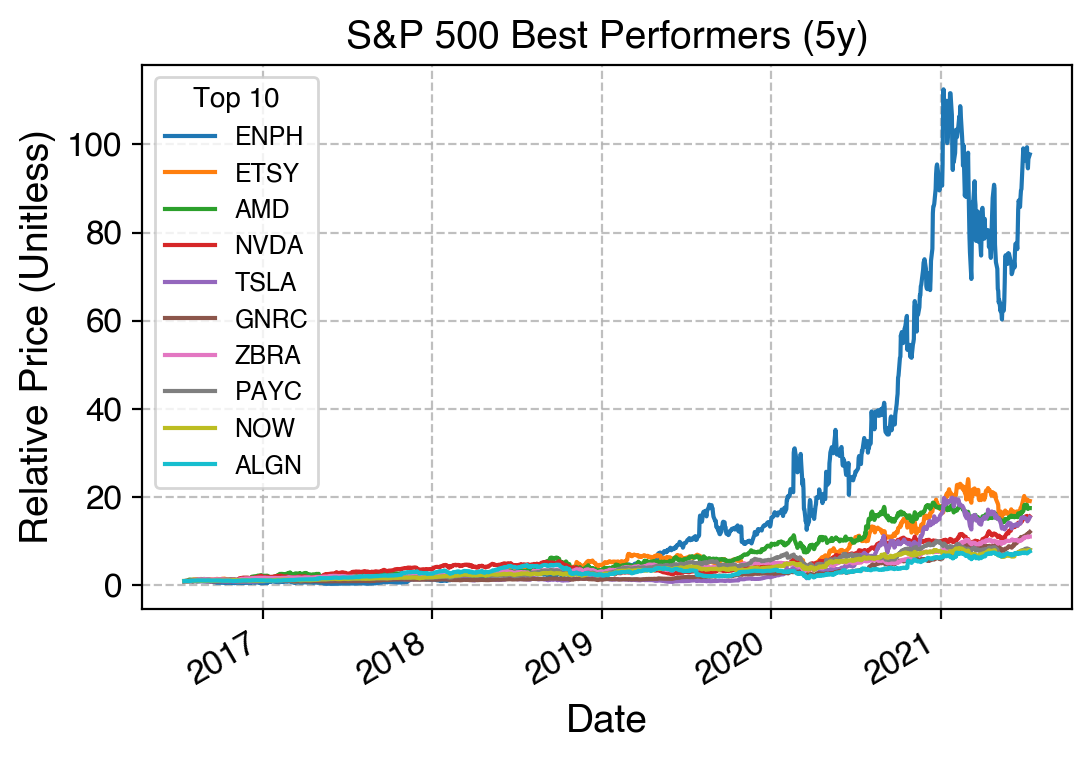

In [11]:
if debug:
    # Plot the returns of all stocks/securities in the dataframe
    ax = (1 + df_database['Close'][symbols].pct_change()).cumprod().plot()
    ax.set_title(f"Relative Price vs. Time ({lookback})")
else:
    # Plot the returns of the top 10 stocks in the S&P 500
    df_returns = (1 + df_database['Close'][symbols].pct_change()).cumprod()
    symbols_top10 = df_returns.iloc[-1].sort_values(ascending=False).index.tolist()[:10]
    ax = (1 + df_returns[symbols_top10].pct_change()).cumprod().plot()
    ax.legend(ncol=1, title='Top 10')
    ax.set_title(f"S&P 500 Best Performers ({lookback})")
ax.set_ylabel('Relative Price (Unitless)')
plt.show()